In [156]:
#Importing packages
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import math

In [157]:
# Reading in data we cleaned
df = pd.read_csv('data/exported_data.csv')

In [158]:
df.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",26141,14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",26025,12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",26023,13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",26155,10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",26097,10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935


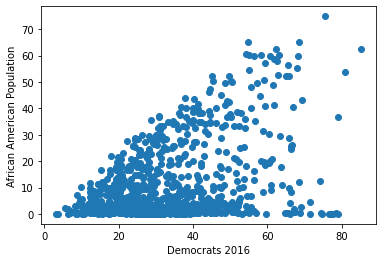

In [159]:
# Looking at some plots of features against our target
fig, ax = plt.subplots()
plt.scatter(df['Democrats 2016'], df['African American Population'])
ax.set_xlabel("Democrats 2016")
ax.set_ylabel("African American Population")
plt.show()

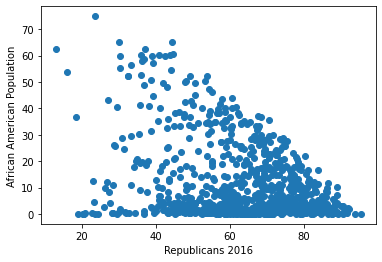

In [160]:
fig, ax = plt.subplots()
plt.scatter(df['Republicans 2016'], df['African American Population'])
ax.set_xlabel("Republicans 2016")
ax.set_ylabel("African American Population")
plt.show()

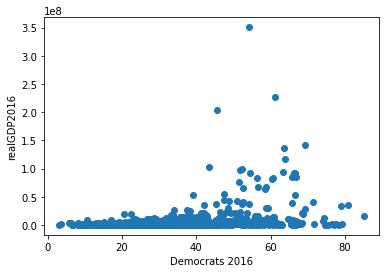

In [161]:
fig, ax = plt.subplots()
plt.scatter(df['Democrats 2016'], df['realGDP2016'])
ax.set_xlabel("Democrats 2016")
ax.set_ylabel("realGDP2016")
plt.show()

In [162]:
# tranforms gdp so its more linear
df['log_gdp'] = np.log10(df['realGDP2016'])

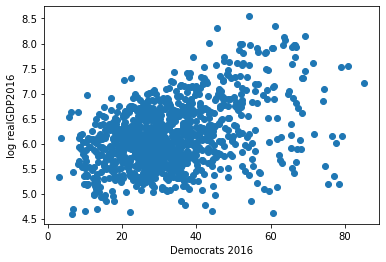

In [163]:
fig, ax = plt.subplots()
plt.scatter(df['Democrats 2016'], df['log_gdp'])
ax.set_xlabel("Democrats 2016")
ax.set_ylabel("log realGDP2016")
plt.show()

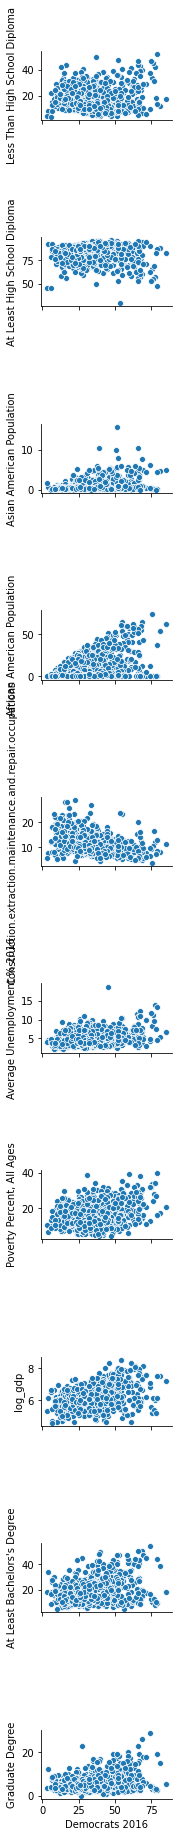

In [164]:
sns.pairplot(data=df,
                  x_vars=['Democrats 2016'],
                  y_vars=['Less Than High School Diploma', 'At Least High School Diploma', 
                          'Asian American Population','African American Population',
                          'Construction.extraction.maintenance.and.repair.occupations',
                         'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                          "At Least Bachelors's Degree", 
                         'Graduate Degree'])

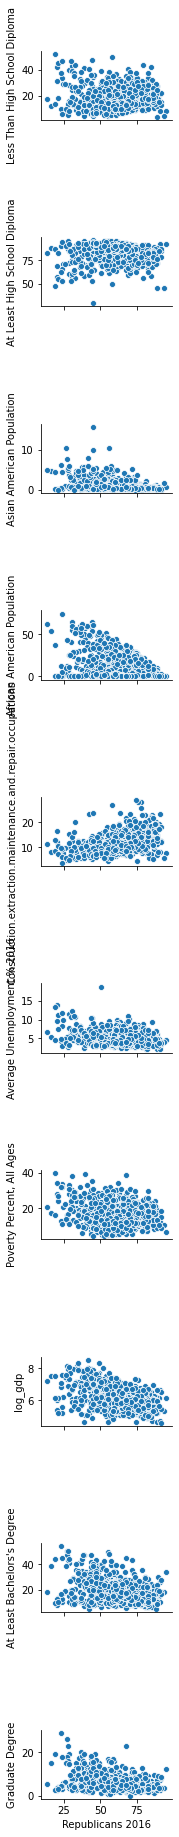

In [165]:
sns.pairplot(data=df,
                  x_vars=['Republicans 2016'],
                  y_vars=['Less Than High School Diploma', 'At Least High School Diploma', 
                          'Asian American Population','African American Population',
                          'Construction.extraction.maintenance.and.repair.occupations',
                         'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp',
                          "At Least Bachelors's Degree" , 'Graduate Degree'])

In [166]:
df.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",26141,14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886,5.594917
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",26025,12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215,6.747800
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",26023,13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171,6.095234
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",26155,10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465,6.204688
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",26097,10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935,5.789665


In [167]:
# This is our set of features WITHOUT including the percentage of vote share each party won in 2012 in each 
# county. Through this model we are able to see how effective external factors are in predicting the voting
# tendencies of counties. 
df_features = df[['Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]

In [168]:
# Creating train test split, using all variables
x_train, x_test, y_train, y_test = train_test_split(df_features, df['Democrats 2016'],
                                                    test_size=0.2,shuffle=True)

In [169]:
# SIMPLE linear regression without cross validation
model_baseline = LinearRegression()
model_baseline.fit(x_train,y_train)
predictions = model_baseline.predict(x_test)
test_score = model_baseline.score(x_test,y_test)
train_score = model_baseline.score(x_train,y_train)
print("Train score: "+str(train_score))
print("Test score: "+str(test_score))

Train score: 0.5651877836381782
Test score: 0.5632882004870691


In [170]:
mse_baseline = mean_squared_error(y_test,predictions)
print("Mean squared error: "+str(mse))


Mean squared error: 94.67117345218708


In [171]:
#Now lets use cross validation to get a better estimate of test score 
scores = cross_validate(model_baseline,x_train,y_train,cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 


In [172]:
#defining functions to print out scores and mses for cross validation sets
def print_r2(s):
    print("Training R^2: "+str(s['train_r2']))
    print("\nValidation R^2: "+str(s['test_r2']))
    
def print_mse(s):
    print("Training negative MSE: "+str(s['train_neg_mean_squared_error']))
    print("\nValidation negative MSE: "+str(s['test_neg_mean_squared_error']))

In [173]:
print_r2(scores)

Training R^2: [0.56269082 0.5402496  0.56666146 0.58618311 0.5938927 ]

Validation R^2: [0.57159379 0.63004491 0.53299677 0.38449966 0.38586828]


In [174]:
print_mse(scores)

Training negative MSE: [-82.31433526 -85.15423773 -82.12900421 -76.18635942 -77.29771863]

Validation negative MSE: [ -79.31459749  -70.75706799  -83.08146875 -123.61742203 -106.17334575]


While this model does not give good results in terms of the r^2 values and the mse, it serves as a good baseline to compare our next models to. Using just demographic and economic characteristics of counties can explain about 55% of the variation in the percentage of votes that the democratic candidate will recieve in that county

In [232]:
# this set of features includes all from above as well as the percentage vote share for each party in 2012
df_features2 = df[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per','65tot_per',
             '65M_per','65F_per']]

In [233]:
x_train, x_test, y_train, y_test = train_test_split(df_features2, df['Democrats 2016'],
                                                    test_size=0.2,shuffle=True)
model_vote = LinearRegression()
model_vote.fit(x_train,y_train)
scores2 = cross_validate(model_vote,x_train,y_train,cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 


In [234]:
print_r2(scores2)

Training R^2: [0.98016372 0.97853135 0.97949546 0.97938784 0.97876241]

Validation R^2: [0.97335713 0.98021954 0.97512202 0.97553281 0.97956407]


In [235]:
print_mse(scores2)

Training negative MSE: [-3.86397535 -4.11007422 -3.92691222 -3.81856191 -4.20664964]

Validation negative MSE: [-4.84396493 -3.86440238 -4.84011779 -5.37629962 -3.44421942]


We can see this model is significantly better than our previous model as is expected.

In [270]:
# now let's see how a model preforms with just the percentage vote share from 2012 as our features
df_features3 = df[['Democrats 2012', 'Republicans 2012']]
x_train, x_test, y_train, y_test = train_test_split(df_features3, df['Democrats 2016'], 
                                                    test_size=0.2,shuffle=True)
model_onlyvote = LinearRegression()
model_onlyvote.fit(x_train,y_train)
scores3 = cross_validate(model_onlyvote,x_train,y_train,cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 



In [271]:
print_r2(scores3)

Training R^2: [0.87624668 0.88240562 0.87726203 0.88306497 0.88828934]

Validation R^2: [0.8971666  0.87443881 0.89803205 0.87182076 0.85147092]


In [272]:
print_mse(scores3)

Training negative MSE: [-22.32217015 -22.46469914 -23.45542764 -22.99837132 -21.57670749]

Validation negative MSE: [-23.68219991 -23.28327638 -19.15852189 -21.1929186  -26.63689174]


We can see that this model outpreforms our original model that did not include the previous percentage vote share but it preforms worse than the model that contains all the demographic and economic features as well as the percentage vote share. This indicates that we should investigate using a combination of these features and that the demographic and economic features do contribute to increasing our models accuracy. 

In [277]:
# Now we are investigating a less complex model 
# We will drop the percentage of population in certain age groups broken down by gender, but include the 
# overall percentages for age groups still
df_features4 = df[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train_main, x_test_main, y_train_main, y_test_main = train_test_split(df_features4, df['Democrats 2016'], 
                                                        test_size=0.2, shuffle=True)
model_4 = LinearRegression()
model_4.fit(x_train_main,y_train_main)
scores_4 = cross_validate(model_4,x_train_main,y_train_main,cv=5,                    
                          scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)



In [278]:
print_r2(scores_4)

Training R^2: [0.9796877  0.97954234 0.97912359 0.97887987 0.97715546]

Validation R^2: [0.97168258 0.97215475 0.97596673 0.97683003 0.98389844]


In [279]:
print_mse(scores_4)

Training negative MSE: [-3.89690113 -3.94656812 -4.06752105 -3.95451122 -4.31953196]

Validation negative MSE: [-5.28195109 -5.04680816 -4.25222622 -4.77109338 -3.21003835]


Comparing the r^2s and the mse values of this model to the one that included all the features, we can see that they are very very similar. This indicates to us that this, less complex, model preforms about the same. Thus we will precede with this subset of features because it is generally preferable to use a less complex model(sparsity). 

In [185]:
# Now we will break it down by geographical subsets to see if we can improve scores
# first we will look at a group of states in the midwest
midwest = ["Michigan","Minnesota","Ohio","Wisconsin","Iowa"]
df_midwest = df[df.State.isin(midwest)]
df_midwest.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",26141,14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886,5.594917
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",26025,12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215,6.747800
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",26023,13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171,6.095234
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",26155,10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465,6.204688
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",26097,10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935,5.789665


In [186]:
df_features_midwest = df_midwest[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_midwest, df_midwest['Democrats 2016'], 
                                                    test_size=0.2,shuffle=True)
model_midwest = LinearRegression()
scores_midwest = cross_validate(model_midwest,x_train,y_train,cv=5,
                                scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)   

In [187]:
print_r2(scores_midwest)

Training R^2: [0.96074109 0.96041275 0.96040433 0.95857632 0.9654041 ]

Validation R^2: [0.94036572 0.95401253 0.96262205 0.96344758 0.93947393]


In [188]:
print_mse(scores_midwest)

Training negative MSE: [-3.65353309 -3.48932723 -3.73708032 -3.86343919 -3.13636897]

Validation negative MSE: [-5.210919   -4.91612151 -3.0773095  -2.96193465 -5.73760596]


In [189]:
# now we will look at southern states
south = ["Florida","Texas","Georgia","Arizona"]
df_south = df[df.State.isin(south)]
df_south.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
83,47.494950,48.995648,47.769323,51.381820,Florida,"Duval County, Florida",12031,12.8,87.2,58.00,3.80,28.85,9.80,4.9,14.5,54932423,24.9,8.0,0.119038,0.061204,0.057834,0.375322,0.184902,0.190420,0.333032,0.158291,0.174741,0.172608,0.073872,0.098736,7.739829
84,28.952191,68.615692,33.704786,65.217391,Florida,"Franklin County, Florida",12037,21.7,78.3,80.20,0.70,12.65,15.35,4.3,23.1,326130,18.8,5.5,0.086921,0.056398,0.030524,0.326258,0.219729,0.106529,0.323833,0.172226,0.151607,0.262988,0.132909,0.130079,5.513391
85,47.474970,49.916507,53.540280,45.682655,Florida,"St. Lucie County, Florida",12111,16.6,83.4,63.45,1.55,17.50,13.65,5.8,17.0,7824890,17.8,6.3,0.092861,0.048053,0.044807,0.279555,0.137036,0.142519,0.335787,0.160468,0.175319,0.291796,0.135928,0.155868,6.893478
86,60.384573,35.744045,58.681188,40.438589,Florida,"Orange County, Florida",12095,13.1,86.9,47.85,4.55,19.20,9.60,4.3,16.3,81146561,30.3,9.6,0.139616,0.068430,0.071186,0.399467,0.199577,0.199890,0.315060,0.153339,0.161721,0.145857,0.063567,0.082290,7.909270
87,24.169284,73.673334,28.577568,70.640309,Florida,"Bradford County, Florida",12007,23.6,76.4,73.40,0.50,20.20,13.95,4.2,18.6,608141,8.6,3.9,0.097987,0.058848,0.039139,0.343118,0.211938,0.131180,0.334644,0.182257,0.152388,0.224251,0.097566,0.126685,5.784004


In [190]:
df_features_south = df_south[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_south, df_south['Democrats 2016'], 
                                                    test_size=0.2,shuffle=True)
model_south = LinearRegression()
scores_south = cross_validate(model_south,x_train,y_train,cv=5,
                              scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)   


In [191]:
print_r2(scores_south)


Training R^2: [0.98660765 0.98718349 0.98893511 0.98786558 0.98578574]

Validation R^2: [0.98812344 0.98566483 0.97772222 0.98246567 0.99033999]


In [192]:
print_mse(scores_south)

Training negative MSE: [-3.51944719 -3.46994002 -3.0166755  -3.35142429 -3.61170717]

Validation negative MSE: [-3.37658815 -3.62445386 -5.43999633 -4.04927037 -3.03463952]


In [193]:
# Now northeast states
northeast = ["North Carolina","Pennsylvania"]
df_northeast = df[df.State.isin(northeast)]
df_northeast.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Fips,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
150,59.392554,37.411176,60.158844,38.818969,Pennsylvania,"Delaware County, Pennsylvania",42045,9.5,90.5,72.80,4.50,18.55,7.75,4.9,10.8,29291807,34.7,14.5,0.130446,0.065478,0.064967,0.316355,0.154363,0.161992,0.352134,0.167976,0.184158,0.201066,0.084142,0.116924,7.466746
151,28.607199,68.271853,38.857778,59.684362,Pennsylvania,"Wayne County, Pennsylvania",42127,13.3,86.7,92.65,0.65,2.55,13.75,5.7,13.7,1456959,17.9,7.3,0.086419,0.047789,0.038630,0.262029,0.153723,0.108306,0.373482,0.195266,0.178217,0.278069,0.134349,0.143719,6.163447
152,24.658451,70.699634,36.813797,61.512849,Pennsylvania,"Bradford County, Pennsylvania",42015,14.6,85.4,96.85,0.55,0.45,10.60,6.5,11.5,5160201,15.7,5.1,0.096000,0.048956,0.047043,0.268766,0.134068,0.134698,0.373237,0.186576,0.186661,0.261997,0.122212,0.139785,6.712667
153,50.217053,46.819155,63.090343,35.795541,Pennsylvania,"Lackawanna County, Pennsylvania",42069,12.5,87.5,91.45,1.35,1.95,8.30,5.6,14.1,8666241,23.7,9.0,0.113048,0.055507,0.057541,0.297003,0.149153,0.147850,0.347751,0.169513,0.178239,0.242198,0.102502,0.139695,6.937831
154,29.581000,67.329267,40.063774,58.095694,Pennsylvania,"Cambria County, Pennsylvania",42021,12.4,87.6,93.70,0.55,3.35,10.05,6.8,15.6,4476405,17.5,6.5,0.114567,0.059572,0.054995,0.262625,0.133809,0.128816,0.357793,0.178864,0.178929,0.265015,0.114493,0.150522,6.650929


In [194]:
df_features_northeast = df_northeast[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_northeast, df_northeast['Democrats 2016'], 
                                                    test_size=0.2,shuffle=True)
model_ne = LinearRegression()
scores_northeast = cross_validate(model_ne,x_train,y_train,cv=5,
                                  scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 

In [195]:
print_r2(scores_northeast)

Training R^2: [0.99037341 0.98604335 0.990587   0.98828146 0.98703763]

Validation R^2: [0.96772413 0.99141936 0.97132588 0.98466822 0.9895905 ]


In [196]:
print_mse(scores_northeast)

Training negative MSE: [-1.81587385 -2.23659361 -1.81542836 -2.25973127 -2.16905485]

Validation negative MSE: [-4.80388879 -2.12973359 -3.73009162 -1.96126809 -2.40631935]


In general, it seems that subsetting by geographical location of states does not change the r^2 or the mse values very much. The model for the midwest subset did seem to drop in accuracy a little but it is difficult to see if these changes are statistically significant or not. This indicates that states in different geographical areas are not different enough to skew the accuracy of a model trained across many different regions. We can investigate how these geographical models preforms on data from 2020 to get further information here.

In [197]:
# now lets visualize the predictions against the true values
# I will use the model on all the states (i.e. not the geographical subsets)

model_5 = LinearRegression()
y_pred = cross_val_predict(model_5, x_train_main, y_train_main, cv=5)


In [198]:
#Running our model on all the states on the test set from that split
model_4.fit(x_train_main,y_train_main)
y_pred_test = model_4.predict(x_test_main)




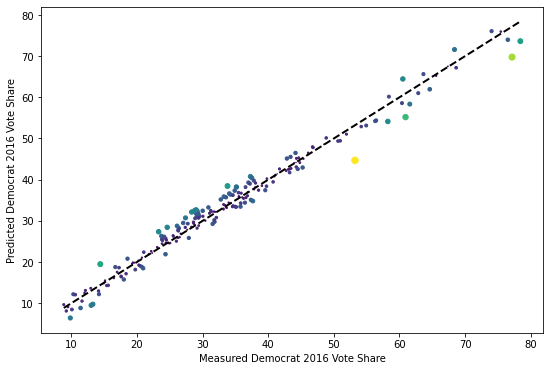

In [199]:
#Scatter plot for the test set
diff = abs(y_test_main-y_pred_test)*5
fig, ax = plt.subplots(figsize = (9,6))
ax.scatter(y_test_main, y_pred_test, s = diff, c = diff)
ax.plot([y_test_main.min(), y_test_main.max()], [y_test_main.min(), y_test_main.max()], 'k--', lw=2)
ax.set_xlabel('Measured Democrat 2016 Vote Share')
ax.set_ylabel('Predicted Democrat 2016 Vote Share')
plt.show()

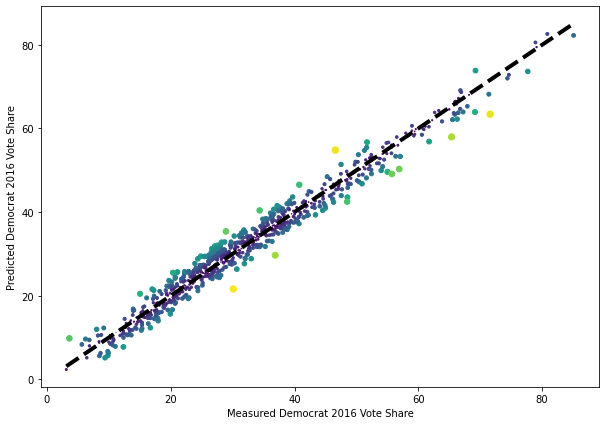

In [200]:
#Scatter plot for cross validation predictions
diff = abs(y_train_main-y_pred)*5
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(y_train_main, y_pred, s = diff, c = diff)
ax.plot([y_train_main.min(), y_train_main.max()], [y_train_main.min(), y_train_main.max()], 'k--', lw=4)
ax.set_xlabel('Measured Democrat 2016 Vote Share')
ax.set_ylabel('Predicted Democrat 2016 Vote Share')
plt.show()

Text(0, 0.5, 'Frequency')

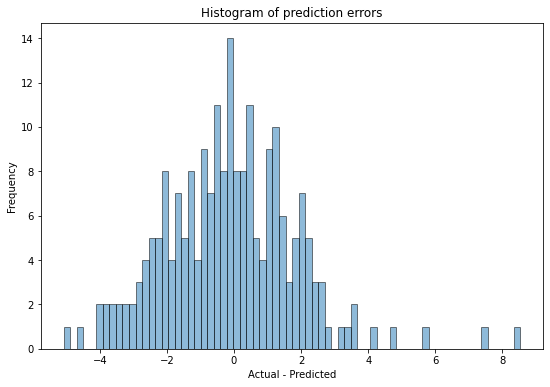

In [201]:
#Histogram of prediction errors for test set
diff = y_test_main-y_pred_test
fig, ax = plt.subplots(figsize = (9,6))
counts,bins,patches = ax.hist(diff,bins = 70, histtype = 'bar', ec = 'black', alpha = 0.5)
plt.title('Histogram of prediction errors')
plt.xlabel('Actual - Predicted')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

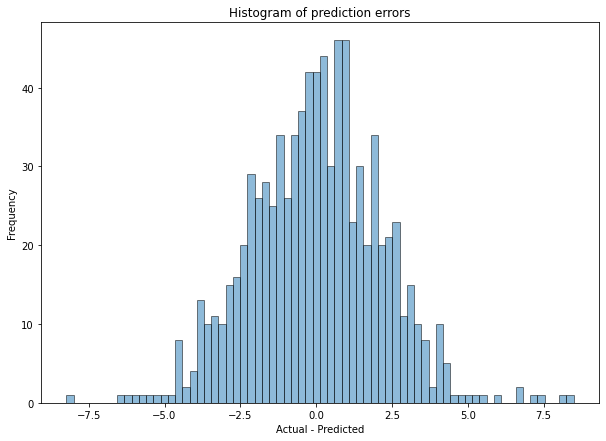

In [202]:
#Histogram of prediction errors for cross validation
diff = y_train_main-y_pred
fig, ax = plt.subplots(figsize = (10,7))
counts,bins,patches = ax.hist(diff,bins = 70, histtype = 'bar', ec = 'black', alpha = 0.5)
#ax.set_xticks(bins)
#plt.xticks(rotation = 'vertical')
plt.title('Histogram of prediction errors')
plt.xlabel('Actual - Predicted')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

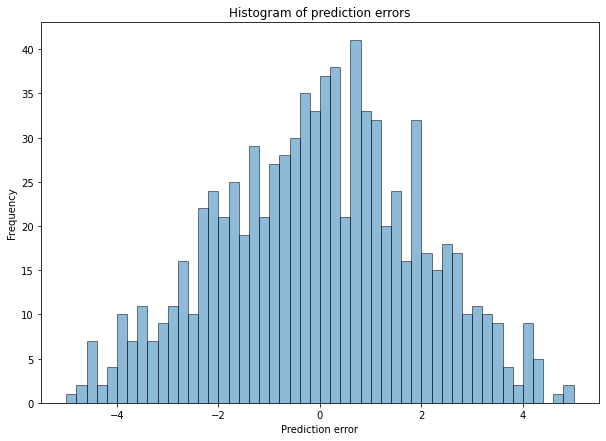

In [203]:
diff_2 = [x for x in diff if (abs(x)) < 5]
fig, ax = plt.subplots(figsize = (10,7))
counts,bins,patches = ax.hist(diff_2,bins = 50, histtype = 'bar', ec = 'black', alpha = 0.5)
#ax.set_xticks(bins)
#plt.xticks(rotation = 'vertical')
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

In [204]:
#import statistics
diff_sq = (y_train_main-y_pred)
mean = np.mean(diff_sq)
se = np.std(diff_sq)
interval = 1.96*se
lower_bound = mean - interval
upper_bound = mean + interval
print("Confidence interval: ["+str(lower_bound)+", "+str(upper_bound)+"]")

Confidence interval: [-4.196195779275818, 4.192816647394217]


In [253]:
# read in 2020 data
df2020_small = pd.read_csv('data/exported_data2020small.csv')
df2020_small.head()

,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,African American Population,Asian American Population,Average Unemployment % 2016,"Poverty Percent, All Ages",Graduate Degree,At Least Bachelors's Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,Republicans 2012,Democrats 2012,log_gdp,Geographic Area Name_x,id,percentage20_Donald_Trump,percentage20_Joe_Biden
0,0.179969,0.314415,0.210177,0.010030,0.002226,12.7,42.8,0.053024,0.056851,0.124147,0.061416,0.062731,0.331707,0.174012,0.157695,0.328104,0.157943,0.170161,0.216042,0.097766,0.118276,0.285,0.654,6.399523,"Apache County, Arizona",4001,0.327,0.661
1,0.123738,0.271272,0.859079,0.048943,0.022196,6.6,27.6,0.089437,0.135565,0.103124,0.057828,0.045296,0.300902,0.162114,0.138789,0.301701,0.146651,0.155050,0.294273,0.140396,0.153877,0.580,0.354,6.635056,"Cochise County, Arizona",4003,0.582,0.399
2,0.058941,0.224030,0.638776,0.009507,0.019028,9.7,38.0,0.145664,0.178253,0.258198,0.117506,0.140692,0.314314,0.162779,0.151535,0.264822,0.129665,0.135157,0.162666,0.077498,0.085168,0.369,0.563,6.805918,"Coconino County, Arizona",4005,0.370,0.610
3,0.121441,0.239276,0.790820,0.059332,0.042873,7.5,21.0,0.122930,0.201831,0.121160,0.062066,0.059094,0.361995,0.182963,0.179032,0.314009,0.153061,0.160948,0.202836,0.091442,0.111394,0.491,0.457,8.310231,"Maricopa County, Arizona",4013,0.482,0.503
4,0.136021,0.347913,0.889599,0.007051,0.009063,9.1,29.3,0.048427,0.081868,0.071982,0.038310,0.033672,0.232595,0.123774,0.108821,0.322675,0.157243,0.165432,0.372748,0.185424,0.187324,0.737,0.222,6.684938,"Mohave County, Arizona",4015,0.750,0.237


In [254]:
df2020_small['Republicans 2012'] = df2020_small['Republicans 2012']*100
df2020_small['Democrats 2012'] = df2020_small['Democrats 2012'] *100
df2020_small['percentage20_Donald_Trump'] = df2020_small['percentage20_Donald_Trump']*100
df2020_small['percentage20_Joe_Biden'] = df2020_small['percentage20_Joe_Biden']*100
df2020_small.head()

,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,African American Population,Asian American Population,Average Unemployment % 2016,"Poverty Percent, All Ages",Graduate Degree,At Least Bachelors's Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,Republicans 2012,Democrats 2012,log_gdp,Geographic Area Name_x,id,percentage20_Donald_Trump,percentage20_Joe_Biden
0,0.179969,0.314415,0.210177,0.010030,0.002226,12.7,42.8,0.053024,0.056851,0.124147,0.061416,0.062731,0.331707,0.174012,0.157695,0.328104,0.157943,0.170161,0.216042,0.097766,0.118276,28.5,65.4,6.399523,"Apache County, Arizona",4001,32.7,66.1
1,0.123738,0.271272,0.859079,0.048943,0.022196,6.6,27.6,0.089437,0.135565,0.103124,0.057828,0.045296,0.300902,0.162114,0.138789,0.301701,0.146651,0.155050,0.294273,0.140396,0.153877,58.0,35.4,6.635056,"Cochise County, Arizona",4003,58.2,39.9
2,0.058941,0.224030,0.638776,0.009507,0.019028,9.7,38.0,0.145664,0.178253,0.258198,0.117506,0.140692,0.314314,0.162779,0.151535,0.264822,0.129665,0.135157,0.162666,0.077498,0.085168,36.9,56.3,6.805918,"Coconino County, Arizona",4005,37.0,61.0
3,0.121441,0.239276,0.790820,0.059332,0.042873,7.5,21.0,0.122930,0.201831,0.121160,0.062066,0.059094,0.361995,0.182963,0.179032,0.314009,0.153061,0.160948,0.202836,0.091442,0.111394,49.1,45.7,8.310231,"Maricopa County, Arizona",4013,48.2,50.3
4,0.136021,0.347913,0.889599,0.007051,0.009063,9.1,29.3,0.048427,0.081868,0.071982,0.038310,0.033672,0.232595,0.123774,0.108821,0.322675,0.157243,0.165432,0.372748,0.185424,0.187324,73.7,22.2,6.684938,"Mohave County, Arizona",4015,75.0,23.7


In [255]:
df2020_small['White (Not Latino) Population'] = 
df2020_small['White (Not Latino) Population'].fillna(df2020_small['White (Not Latino) Population'].mean())

df2020_small['African American Population'] =
df2020_small['African American Population'].fillna(df2020_small['African American Population'].mean())

df2020_small['Asian American Population'] = 
df2020_small['Asian American Population'].fillna(df2020_small['Asian American Population'].mean())


In [256]:

x_test2020 = df2020_small[['Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]


y_test2020 = df2020_small['percentage20_Joe_Biden']


In [257]:
x_test2020.isnull().any()

Less Than High School Diploma    False
At Least High School Diploma     False
White (Not Latino) Population    False
Asian American Population        False
African American Population      False
Average Unemployment % 2016      False
Poverty Percent, All Ages        False
log_gdp                          False
At Least Bachelors's Degree      False
Graduate Degree                  False
1824tot_per                      False
1824M_per                        False
1824F_per                        False
2544tot_per                      False
2544M_per                        False
2544F_per                        False
4564tot_per                      False
4564M_per                        False
4564F_per                        False
65tot_per                        False
65M_per                          False
65F_per                          False
dtype: bool

In [258]:
df_null_ratios = df2020_small.isnull().sum()/len(df2020_small)*100
print(df_null_ratios)

Less Than High School Diploma    0.0
At Least High School Diploma     0.0
White (Not Latino) Population    0.0
African American Population      0.0
Asian American Population        0.0
Average Unemployment % 2016      0.0
Poverty Percent, All Ages        0.0
Graduate Degree                  0.0
At Least Bachelors's Degree      0.0
1824tot_per                      0.0
1824M_per                        0.0
1824F_per                        0.0
2544tot_per                      0.0
2544M_per                        0.0
2544F_per                        0.0
4564tot_per                      0.0
4564M_per                        0.0
4564F_per                        0.0
65tot_per                        0.0
65M_per                          0.0
65F_per                          0.0
Republicans 2012                 0.0
Democrats 2012                   0.0
log_gdp                          0.0
Geographic Area Name_x           0.0
id                               0.0
percentage20_Donald_Trump        0.0
p

In [259]:
baseline2020_preds = model_baseline.predict(x_test2020)


In [260]:
baseline2020_preds

array([65.81082098, 47.70120891, 63.71264249, 52.58696251, 52.6811545 ,
       59.24396714, 54.46675879, 44.81528104, 51.62682936, 56.91179839,
       56.71673088, 49.24962691, 51.33004421, 54.92889673, 46.87358546,
       53.31818376, 47.88900682, 46.12579939, 47.28619946, 49.28724766,
       50.67547005, 45.0376733 , 51.28126526, 43.71000718, 50.7865559 ,
       50.0287865 , 46.21276663, 47.12585372, 60.75246536, 48.58347735,
       48.67234458, 47.41311329, 62.83737057, 42.51059295, 47.46676914,
       42.48821851, 51.86029585, 52.39019726, 52.71861639, 49.5736129 ,
       54.2131346 , 50.22658931, 50.13990024, 46.33826616, 49.52627718,
       46.47492713, 48.19649184, 48.74835481, 39.27579418, 52.87089061,
       47.94576179, 40.79795712, 49.1193084 , 54.22873355, 60.58126426,
       50.26716164, 43.37522429, 49.04273413, 46.00787965, 59.02755441,
       49.14959309, 47.47740074, 37.33437552, 50.2712991 , 46.42831387,
       57.27060141, 51.38150055, 54.11400097, 50.60066834, 44.97

In [261]:
errors = (baseline2020_preds - y_test2020)**2
mse = np.mean(errors)
mse

257.21395636644564

In [262]:
mse_baseline

95.64904340666907

In [263]:
#Add in previous year vote share to features
x_test2020_vote = df2020_small[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]


y_test2020_vote = df2020_small['percentage20_Joe_Biden']



In [264]:
main2020_preds = model_vote.predict(x_test2020_vote)

In [265]:
errors3 = (main2020_preds - y_test2020_vote)**2
mse3 = np.mean(errors3)
mse3

19.208927234239983

In [242]:
#main2020_preds

In [273]:
x_test_onlyvote = df2020_small[['Democrats 2012', 'Republicans 2012']]
y_test2020_onlyvote = df2020_small['percentage20_Joe_Biden']



In [274]:
vote_only_preds = model_onlyvote.predict(x_test_onlyvote)


In [275]:
errors4 = (vote_only_preds - y_test2020_onlyvote)**2
mse4 = np.mean(errors4)
mse4

367.023442888349

In [276]:
vote_only_preds

array([40.12316166, 11.41096969, 29.54174477, 25.46244633,  8.06389353,
       23.05064356, 33.79672186, 21.01099434, 15.17853877, 27.22217969,
       39.48317708, 11.17717267, 21.94520014, 54.76965696, 23.75434045,
       17.23906956, 13.62300945, 25.67873521, 17.05574709, 32.88668574,
       22.35796392, 26.99495889, 21.66857238, 22.63681219, 35.46314993,
       24.85320765, 24.27907057, 26.31214357, 42.54047305, 26.97958594,
       24.47447788, 24.20442634, 51.90776829, 29.68338942, 12.12675142,
        5.91005745, 43.13327119, 45.9732107 , 45.08512375, 23.11213536,
       31.52105511, 27.98843597, 20.56641707, 18.91536195, 35.95935467,
        5.61805674, 30.27289945, 30.13676342, 22.82893139, 28.0971142 ,
       10.19906855,  8.94540426, 10.64915444, 46.90412838, 22.6433884 ,
       17.0590352 ,  7.01443328, 41.63372505,  6.80694113, 46.41449986,
       72.87848287, 30.64283249, 16.59357636, 13.75034875, 64.22803696,
       58.95985414, 41.12765598, 24.78513964, 15.09731832,  9.43

In [280]:
x_test2020_main = df2020_small[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]

y_test2020_main = df2020_small['percentage20_Joe_Biden']

In [281]:
main2020_preds = model_4.predict(x_test2020_main)


In [282]:
errors5 = (main2020_preds - y_test2020_main)**2
mse5 = np.mean(errors5)
mse5

16.06244494760044

In [283]:
# Alexander - look at using different technique to impute missing data

# Emily - clean all notebooks, look at making visualizations, investigate absentee data

# Vaed - look for 2018 edu data


# In general:

# construct one model dropping the education, using the race data from the kaggle set, we'd have to retrain 2016
# without education

# explore absentee voting stuff

# meeting tuesday @6:30

